In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [82]:
model = MinMaxScaler(feature_range=(-1,1))

In [83]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

In [84]:
X, y = data[:,1:], data[:,0]

In [85]:
X_mod = model.fit_transform(X) 

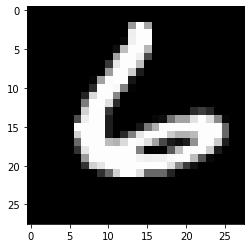

In [86]:
plt.imshow(X_mod[100].reshape(28,28), cmap="gray")

In [98]:
X_mod.max()

1.0

In [109]:
model = Sequential()

In [110]:
model.add(Dense(units=100, activation="tanh", input_shape=(784,)))

In [111]:
model.add(Dense(units=784, activation="tanh"))

In [112]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_15 (Dense)             (None, 784)               79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.compile(optimizer="adam", loss="mse")

In [122]:
model.fit(X_mod, X_mod, batch_size=100, epochs=10)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0924
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0730
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0608
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0527
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0469
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0426
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0392
Epoch 8/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0363
Epoch 9/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0335
Epoch 10/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0311


In [123]:
gen = model.predict(X_mod[:10])

In [124]:
gen.shape

(10, 784)

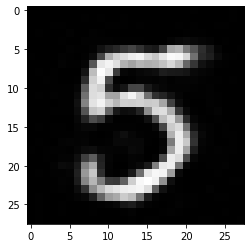

In [125]:
plt.imshow(gen[0].reshape(28,28), cmap="gray")

In [127]:
encoder = Model(model.input, model.layers[1].output)

In [128]:
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14_input (InputLayer)  [(None, 784)]             0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_15 (Dense)             (None, 784)               79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [135]:
decoder = Model(model.layers[2].input, model.input)

IndexError: list index out of range